In [1]:
import MIMENet
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
#set path to simulation data
simulation_path = "/mnt/d/data/MIME_data/simData/dmMIME/highSpecies/errorTest"

In [3]:
#set training parameters
training_path = simulation_path+'/data/trainingData.txt'
test_path = simulation_path+'/data/testData.txt'
epochs = 10
learning_rate = 0.00001
batch_size = 2**11
lambda_l1 = 0.000001
hidden_size_factor = 5
bottleneck = 1/5

In [4]:
model, train_history, mae_history = MIMENet.train(training_path, test_path, epochs, learning_rate, batch_size, lambda_l1, hidden_size_factor, bottleneck)

Device: cuda:0
Epoch: 1/10


100%|██████████| 5451/5451 [02:37<00:00, 34.68it/s]


Epoch: 2/10


100%|██████████| 5451/5451 [02:26<00:00, 37.34it/s]


Epoch: 3/10


100%|██████████| 5451/5451 [02:22<00:00, 38.25it/s]


Epoch: 4/10


100%|██████████| 5451/5451 [02:22<00:00, 38.27it/s]


Epoch: 5/10


100%|██████████| 5451/5451 [02:22<00:00, 38.29it/s]


Epoch: 6/10


100%|██████████| 5451/5451 [02:22<00:00, 38.13it/s]


Epoch: 7/10


100%|██████████| 5451/5451 [02:23<00:00, 38.09it/s]


Epoch: 8/10


100%|██████████| 5451/5451 [02:21<00:00, 38.52it/s]


Epoch: 9/10


100%|██████████| 5451/5451 [02:21<00:00, 38.48it/s]


Epoch: 10/10


100%|██████████| 5451/5451 [02:24<00:00, 37.83it/s]


In [5]:
#save model
torch.save(model.state_dict(), './modelError.pth')

In [6]:
#save training history and mae history
np.savetxt('./train_history_err.txt', train_history)
np.savetxt('./mae_history_err.txt', mae_history)

In [7]:
#load saved model, training history, and mae history
input_size = len(open(training_path).readline().split(' ')) - 1
model = MIMENet.MIMENet(input_size, hidden_size_factor, bottleneck, 1)
model.load_state_dict(torch.load('./modelError.pth'))
#puto model to gpu
model.to('cuda:0')
#put model in eval mode
model.eval()
train_history = np.loadtxt('./train_history_err.txt')
mae_history = np.loadtxt('./mae_history_err.txt')

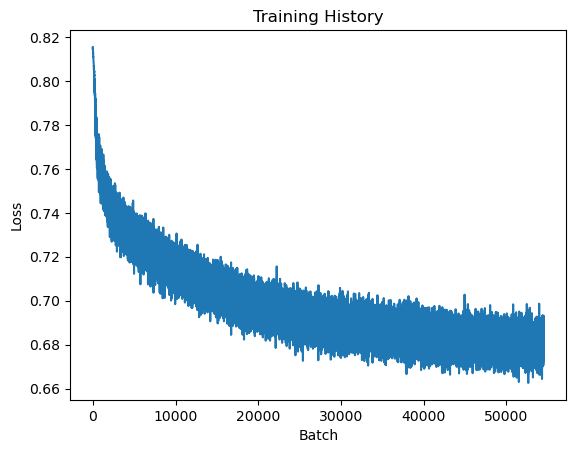

In [8]:
#plot training history
plt.plot(train_history)
plt.title("Training History")
plt.ylabel("Loss")
plt.xlabel("Batch")
#limit x axis
#plt.xlim(0, 1000)
plt.show()

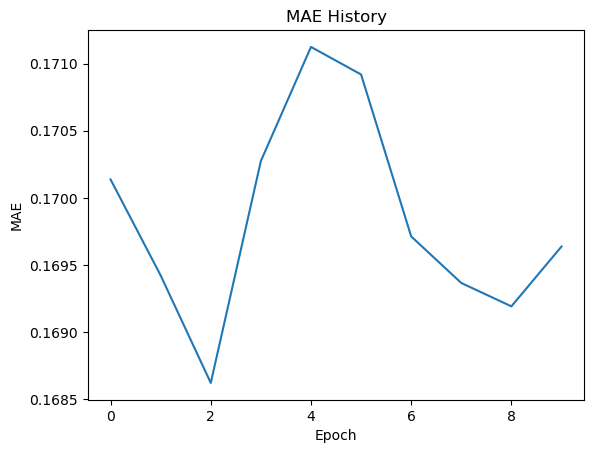

In [9]:
#plot mae history
plt.plot(mae_history)
plt.title("MAE History")
plt.ylabel("MAE")
plt.xlabel("Epoch")
plt.show()

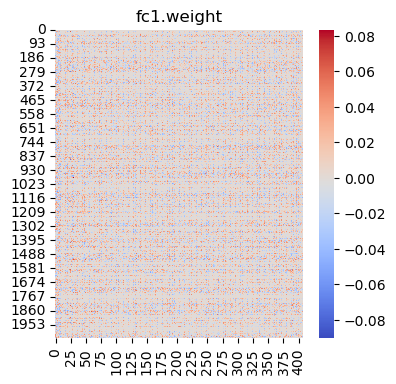

max weight value:  0.0833802
min weight value:  -0.09019404
number of pruned weights:  131216
number of non zero weights:  701104


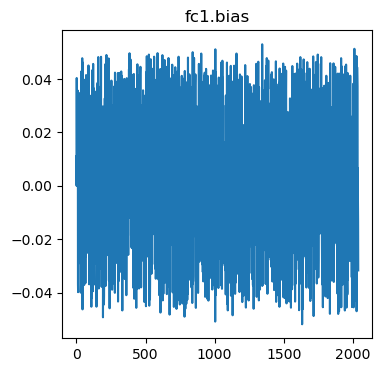

max bias value:  0.05303549
min bias value:  -0.051900886
number of pruned biases:  130
number of non zero biases:  1910


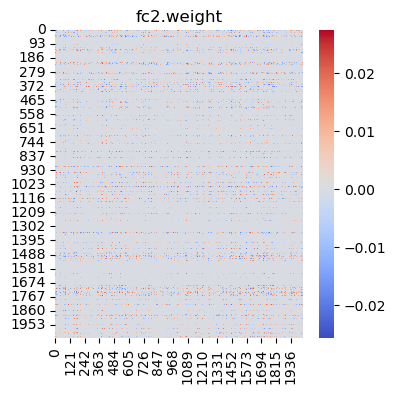

max weight value:  0.02733994
min weight value:  -0.025574634
number of pruned weights:  3175274
number of non zero weights:  986326


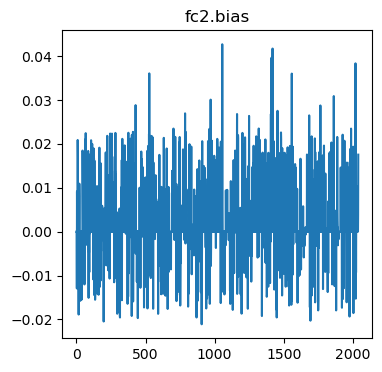

max bias value:  0.042726494
min bias value:  -0.021122197
number of pruned biases:  1338
number of non zero biases:  702


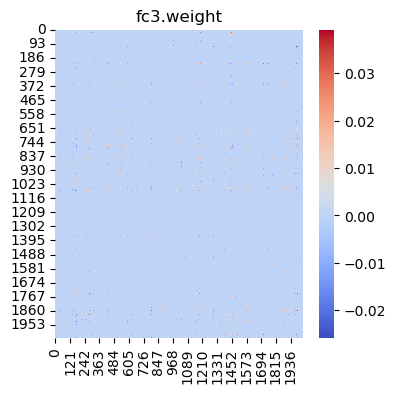

max weight value:  0.039203018
min weight value:  -0.025814397
number of pruned weights:  3932853
number of non zero weights:  228747


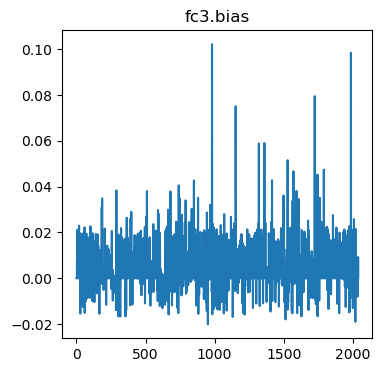

max bias value:  0.10224861
min bias value:  -0.02014103
number of pruned biases:  1225
number of non zero biases:  815


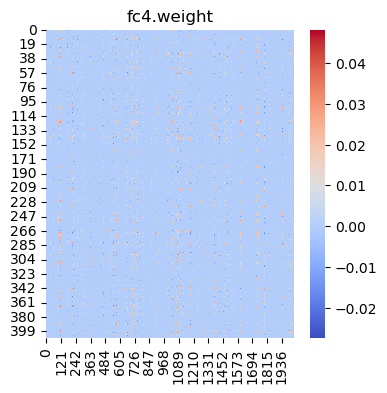

max weight value:  0.048047744
min weight value:  -0.027234323
number of pruned weights:  749336
number of non zero weights:  82984


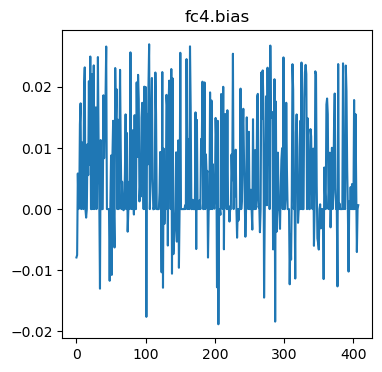

max bias value:  0.026968503
min bias value:  -0.01884577
number of pruned biases:  132
number of non zero biases:  276


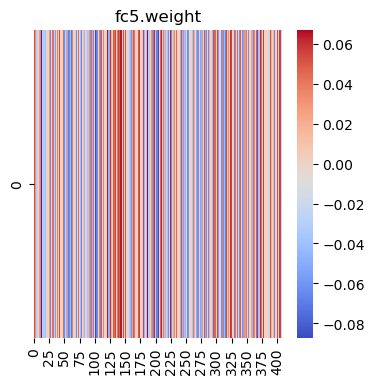

max weight value:  0.06704378
min weight value:  -0.08714426
number of pruned weights:  132
number of non zero weights:  276


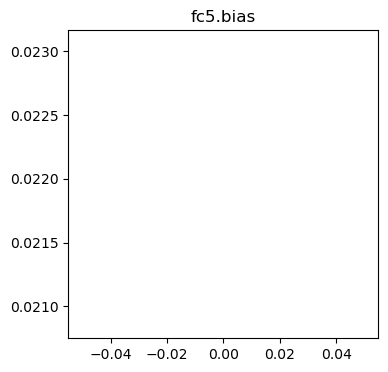

max bias value:  0.021956807
min bias value:  0.021956807
number of pruned biases:  0
number of non zero biases:  1


In [10]:
for name, param in model.named_parameters():
    #if weight is not a bias
    if 'bias' not in name:
        #reshape weights to 2d array
        weight = param.data.cpu().numpy().reshape(param.data.cpu().numpy().shape[0], param.data.cpu().numpy().shape[1])
        #plot heatmap of weights
        plt.figure(figsize=(4,4))
        sns.heatmap(weight, cmap='coolwarm')
        plt.title(name)
        plt.show()

        print('max weight value: ', np.max(weight))
        print('min weight value: ', np.min(weight))
        #print('number of weights: ', weight.size)
        print('number of pruned weights: ', np.sum(weight == 0))
        print('number of non zero weights: ', np.sum(weight != 0))

    else:
        bias = param.data.cpu().numpy()
        #plot histogram of biases
        plt.figure(figsize=(4,4))
        sns.lineplot(bias.flatten())
        plt.title(name)
        plt.show()
 
        print('max bias value: ', np.max(bias))
        print('min bias value: ', np.min(bias))
        #print('number of biases: ', bias.size)
        print('number of pruned biases: ', np.sum(bias == 0))
        print('number of non zero biases: ', np.sum(bias != 0))

In [11]:
#get percent of parameters pruned
total_params = 0
pruned_params = 0
for param in model.parameters():
    total_params += param.numel()
    pruned_params += np.sum(param.data.cpu().numpy() == 0)
print('percent of parameters pruned: ', pruned_params/total_params)

percent of parameters pruned:  0.7995812212718703


In [12]:
# read in kd values
kds = np.loadtxt(simulation_path+'/secondFromProt1/prot1/single_kds.txt')

#insert 1 at position 0 and then every 3rd position
kds = np.insert(kds, 0, 1)
kds = np.insert(kds, np.arange(4, len(kds), 3), 1)
kds[0:10]

array([1.      , 1.00145 , 1.      , 0.472069, 1.      , 1.      ,
       0.102312, 1.      , 1.      , 0.681123])

In [13]:
input_size = len(open(training_path).readline().split(' ')) - 1
predictions = MIMENet.inferSingleProbabilities(model, input_size)

100%|██████████| 400/400 [00:00<00:00, 714.39it/s]


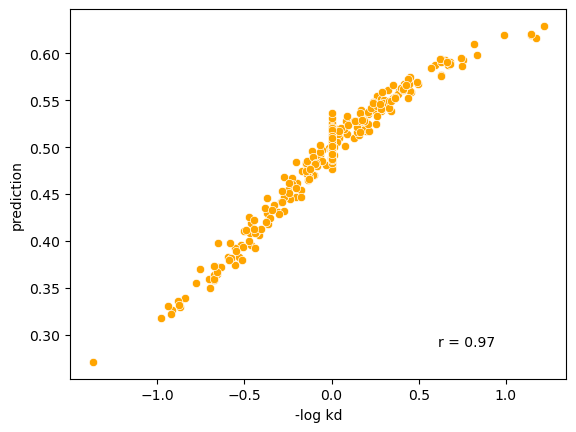

In [14]:
#two plots -log kd vs predictionZeroConc and predictionOneConc
sns.scatterplot(x=-np.log10(kds), y=predictions, color='orange')
plt.xlabel('-log kd')
plt.ylabel('prediction')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(-np.log10(kds), predictions)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

Text(0, 0.5, 'z score')

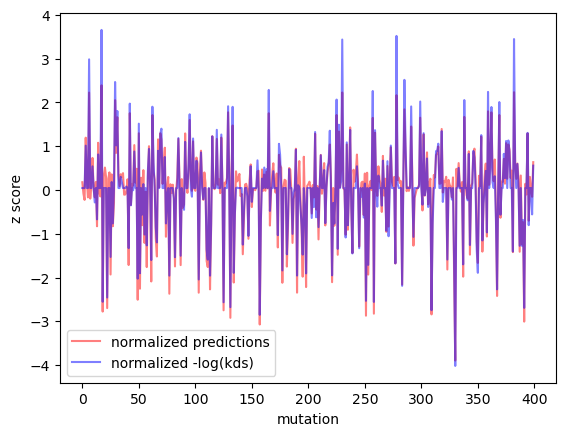

In [15]:
#z score predictions
predictionsNorm = (predictions - np.mean(predictions))/np.std(predictions)

#z score -np.log(kds)
kdsNorm = (-np.log10(kds) - np.mean(-np.log10(kds)))/np.std(-np.log10(kds))

#lineplot of z score predictions
sns.lineplot(x=np.arange(0, len(predictionsNorm)), y=predictionsNorm, label='normalized predictions', color='red', alpha=0.5)
sns.lineplot(x=np.arange(0, len(kdsNorm)), y=kdsNorm, label='normalized -log(kds)', color='blue', alpha=0.5)
plt.xlabel('mutation')
plt.ylabel('z score')

(0.0, 1.0)

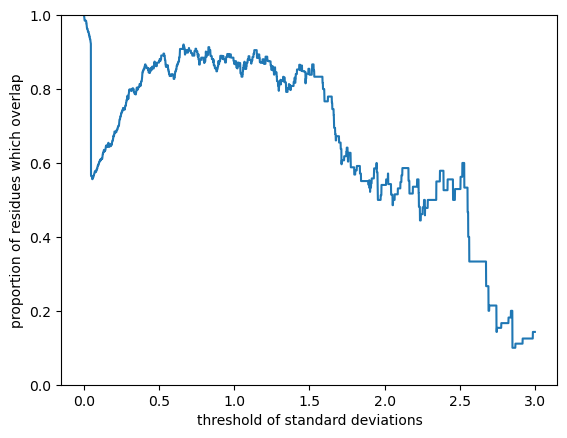

In [16]:
#check overlap of normalized predictions and normalized -log(kds) for absolute value greater than 0.5
#loop over threshold values
overlapProportions = []
for threshold in np.arange(0, 3, 0.001):
    #get indices of scaled predictions and scaled -log(kds) that are greater than the threshold
    indices = np.where(np.abs(predictionsNorm) > threshold)[0]
    indices2 = np.where(np.abs(kdsNorm) > threshold)[0]
    #get the intersection of the two sets of indices
    overlap = np.intersect1d(indices, indices2)
    #get the proportion of the intersection to the union of the two sets of indices
    overlapProportions.append(len(overlap)/len(np.union1d(indices, indices2)))

#plot overlapProportions
sns.lineplot(x=np.arange(0, 3, 0.001), y=overlapProportions)
plt.xlabel('threshold of standard deviations')
plt.ylabel('proportion of residues which overlap')
plt.ylim(0, 1)

In [17]:
input_size = len(open(training_path).readline().split(' ')) - 1
predictionsPairwise = MIMENet.inferPairwiseProbabilities(model, input_size)

100%|██████████| 100/100 [00:20<00:00,  4.99it/s]


In [18]:
#load pairwise kd values
kdsPairwise = np.loadtxt(simulation_path+'/secondFromProt1/prot1/pairwise_kds.txt')
kdsPairwise[0:10]

array([1.00145  , 0.10246  , 1.00145  , 1.       , 0.102312 , 1.       ,
       0.472069 , 0.0482983, 0.472069 , 0.682111 ])

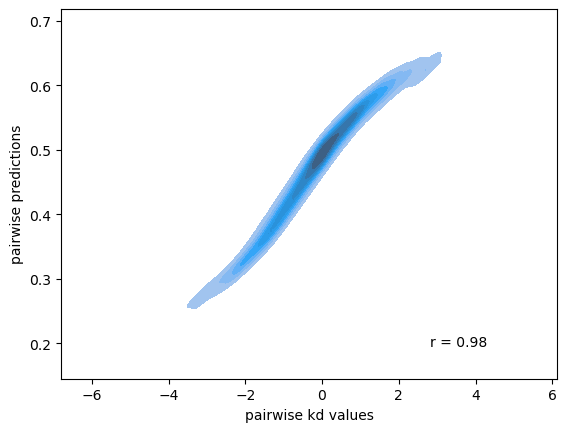

In [19]:
#get correlation coefficient
np.corrcoef(-np.log(kdsPairwise), predictionsPairwise)[0,1]
#density plot pairwise predictions vs pairwise kd values
sns.kdeplot(x=-np.log(kdsPairwise), y=predictionsPairwise, fill=True)
plt.xlabel('pairwise kd values')
plt.ylabel('pairwise predictions')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(-np.log(kdsPairwise), predictionsPairwise)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

In [20]:
input_size = len(open(training_path).readline().split(' ')) - 1
epistasisPairwise = MIMENet.inferEpistasis(model, input_size)

100%|██████████| 100/100 [00:53<00:00,  1.88it/s]


In [21]:
#load pairwise epistasis values
epistasisPairwiseSim = np.log(np.loadtxt(simulation_path+'/secondFromProt1/prot1/pairwise_epistasis.txt'))
epistasisPairwiseSim[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Text(0, 0.5, 'epistasis')

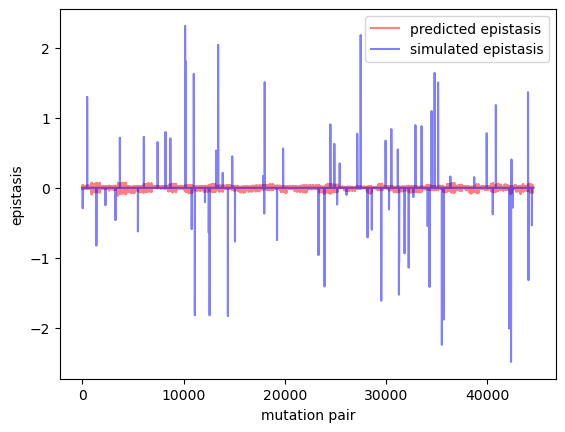

In [22]:
#normalize predictions and simulated epistasis values
epistasisPairwiseLog = np.log(epistasisPairwise)
epistasisPairwiseNorm = (epistasisPairwise - np.mean(epistasisPairwise))/np.std(epistasisPairwise)
epistasisPairwiseSimNorm = (epistasisPairwiseSim - np.mean(epistasisPairwiseSim))/np.std(epistasisPairwiseSim)

#lineplot of z score predictions
sns.lineplot(x=np.arange(0, len(epistasisPairwise)), y=epistasisPairwiseLog, label='predicted epistasis', color='red', alpha=0.5)
sns.lineplot(x=np.arange(0, len(epistasisPairwiseSim)), y=epistasisPairwiseSim, label='simulated epistasis', color='blue', alpha=0.5)
plt.xlabel('mutation pair')
plt.ylabel('epistasis')